# Titanic Machine Learning Kaggle Competition

Link to competition: https://www.kaggle.com/competitions/titanic/overview

### Kaggle provides the training dataset to train the model and then the test set to test your model on. 

### I built a predictive model to figure out what types of people survived on the Titanic using the passenger data.


In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Read training data
titanic_df=pd.read_csv(r"C:\Users\mapze\OneDrive\Documents\Python Scripts\Machine Learning\train.csv")


In [61]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
#Check for missing values in the dataset
print(titanic_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### Age is missing 177 values. I imputed the missing values based on the mean age of the passengers in that class. For example, if a passenger in first class is missing an age, it is imputed with the mean age of all passengers in 1st class. 

In [64]:
'''Fill Missing Ages'''
def fill_missing_ages(columns):

    age = columns[0]

    passenger_class = columns[1]
    
    
    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()
        
    else:

        return age

#### This line of code will apply this function to all missing age values.

In [65]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(fill_missing_ages, axis = 1)

#### I dropped the Cabin column since most of the values are missing.

In [66]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [67]:
print(titanic_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [68]:
titanic_df.dropna(inplace = True)

#### Lastly, I dropped the 2 missing fields in the Embarked column since that is such a small percentage of the total.

## Exploratory Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

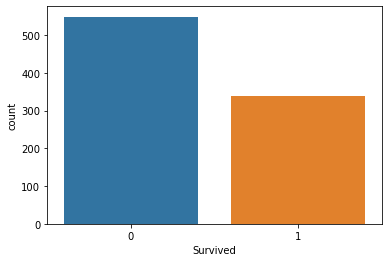

In [69]:
sns.countplot(x='Survived', data=titanic_df)


#### This countplot shows the majority of people did not survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

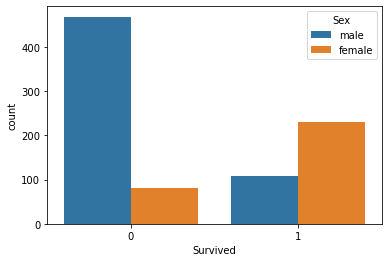

In [70]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)

#### This countplot shows that many more women survived than men.

<AxesSubplot:xlabel='Survived', ylabel='count'>

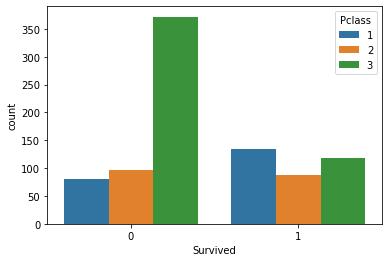

In [71]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)

#### 1st class passengers had the best chance of survival while the 3rd class didn't have a very good survival rate.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

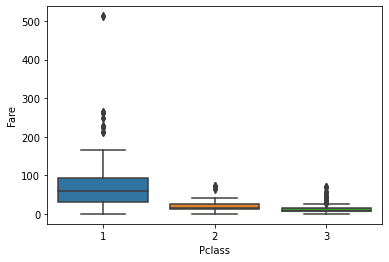

In [72]:
sns.boxplot(x=titanic_df['Pclass'],y=titanic_df['Fare'])

#### 1st class paid a much higher fare than 2nd and 3rd class which is to be expected.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

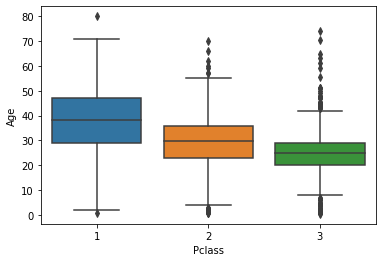

In [73]:
sns.boxplot(x=titanic_df['Pclass'],y= titanic_df['Age'])

#### Passengers in 1st class were the oldest and the most wealthy while 3rd class passengers were much younger on average. 

Text(0.5, 0, 'Fare')

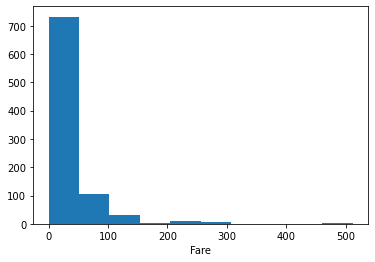

In [74]:
plt.hist(titanic_df['Fare'])
plt.xlabel("Fare")

### Make dummy variables for Sex and Embarked columns and drop unnecessary columns

In [75]:
'''Make dummy variables for categorical features'''
Sex_dummies = pd.get_dummies(titanic_df['Sex'], drop_first = True)
Embarked_dummies = pd.get_dummies(titanic_df['Embarked'], drop_first = True)

titanic_df = pd.concat([titanic_df, Sex_dummies, Embarked_dummies], axis = 1)

titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [76]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


#### Split training set up to build model

In [77]:
y = titanic_df['Survived']

X = titanic_df.drop('Survived', axis = 1)

In [78]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


## Build Optimal Random Forest Model with Grid Search

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#Grid Search
max_depth=[2,8,12,16,20]
n_estimators = [64, 100, 150, 256, 350]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X, y)

In [82]:
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
print(results_df)

Best: [0.80093316 0.78406018 0.78854821 0.79754333 0.79416619 0.82455405
 0.82340507 0.82004698 0.82230051 0.82455405 0.81779978 0.82343046
 0.82454771 0.82117057 0.82229417 0.81668254 0.81781248 0.80880467
 0.80991557 0.80767473 0.79756237 0.81104552 0.81329271 0.80879832
 0.81105186], using {'max_depth': 8, 'n_estimators': 64}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.064953      0.004921         0.007080        0.007143   
1        0.098870      0.006803         0.010245        0.005707   
2        0.157080      0.013405         0.016249        0.003564   
3        0.254810      0.017728         0.020210        0.006201   
4        0.352261      0.025796         0.024539        0.007325   
5        0.072985      0.006523         0.009383        0.007661   
6        0.113695      0.009853         0.012494        0.006247   
7        0.174951      0.014225         0.015355        0.000730   
8        0.286364      0.017197         0.025544        0

#### The Random Forest with the best score had 64 n_estimators and a max depth of 8

In [83]:
FinalForest=RandomForestClassifier(n_estimators=64,max_depth=8,max_features='sqrt')


#### Fit best model to the training data

In [84]:
FinalForest.fit(X, y)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=64)

## Import the Test Data

In [85]:
'''Import Test Data'''
test_data=pd.read_csv(r"C:\Users\mapze\OneDrive\Documents\Python Scripts\Machine Learning\test.csv")

In [86]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Only used features in the test data that are used in my model

In [87]:
features=['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
xtest=test_data[features]

In [88]:
'''Make dummy variables for categorical features'''
Sex_dummies = pd.get_dummies(xtest['Sex'], drop_first = True)
Embarked_dummies = pd.get_dummies(xtest['Embarked'], drop_first = True)

xtest = pd.concat([xtest, Sex_dummies, Embarked_dummies], axis = 1)
xtest.drop(['Sex','Embarked'],axis=1, inplace=True)

In [89]:
xtest

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,NaN,0,0,8.0500,1,0,1


In [90]:
xtest.isna().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
male       0
Q          0
S          0
dtype: int64

#### Impute missing test data age values the same way as the training data. Also impute the one missing Fare value with the mean.

In [91]:
xtest['Age'] = xtest[['Age', 'Pclass']].apply(fill_missing_ages, axis = 1)
xtest['Fare'] = xtest['Fare'].fillna(xtest['Fare'].mean())

In [92]:
xtest.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

## Make Random Forest Predictions on the Test Set

In [93]:
'''Make Random Forest Model Predictions on the test set'''
predictions=FinalForest.predict(xtest)


#### Predictions should have 418 values and does

In [95]:
predictions.shape

(418,)

## Conclusion
### Lastly, I outputted my predictions on the test set to a csv file and submitted them. From my analysis it was clear that many more women survived than men and 1st class passengers had a much better chance of survival. Many of the 1st class passengers were also older than the 2nd and 3rd class passengers.